<a href="https://colab.research.google.com/github/agustinperalta/Diplodatos-g18/blob/main/G18_Practico_2_Entregable_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2022*

---

### *Grupo N°:* 18

### *Integrantes:*
#### Parada Larrosa, Francisco
#### Peralta, Agustín
####  Porcel, Carolina
####  Quiros, Agustina


## Trabajo práctico entregable - Parte 2

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [1]:
pip install python-decouple

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import matplotlib.pyplot as plt
import numpy
import pandas as pd

import seaborn as sns
sns.set_context('talk')
sns.set(style="dark")
#from decouple import config
from sqlalchemy import create_engine, text

import plotly
plotly.__version__
# Make sure it's 4.14.3

'5.5.0'

In [3]:
melb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
#df_airbnb=pd.read_csv('airbnb_price_by_zipcode.csv')
df_airbnb=pd.read_csv('https://raw.githubusercontent.com/agustinperalta/Diplodatos-g18/main/airbnb_price_by_zipcode%20(2).csv')

## Ejercicio 1 SQL: 

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



**1. Base SQL**

In [5]:
# Primero se crea la instancia
engine = create_engine('sqlite:///sysarmy.sqlite3', echo=True)

In [6]:
# Creacion de la base de datos
melb_df.to_sql('melb', con=engine, if_exists="replace")

2022-05-31 22:53:21,778 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melb")
2022-05-31 22:53:21,786 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-31 22:53:21,794 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("melb")
2022-05-31 22:53:21,798 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-31 22:53:21,810 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-05-31 22:53:21,825 INFO sqlalchemy.engine.Engine 
CREATE TABLE melb (
	"index" BIGINT, 
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" TEXT, 
	"Distance" FLOAT, 
	"Postcode" FLOAT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT
)


2022-05-31 22:53:21,829 INFO sqlalchemy.engine.Engine [no key 0.00407s] ()
2022-05-31 22:53:21,850 INFO sqlalchemy.engine.En

In [7]:
#Transformamos los valores en coma flotante ej 3000 a 3000.0
df_airbnb['zipcode'] = pd.to_numeric(df_airbnb.zipcode, errors='coerce')

**2. Creación de base de datos de AirBnB**

In [8]:
df_airbnb.to_sql('airbnb', con=engine, if_exists="replace")

2022-05-31 22:53:22,651 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb")
2022-05-31 22:53:22,652 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-31 22:53:22,655 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("airbnb")
2022-05-31 22:53:22,657 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-31 22:53:22,662 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-05-31 22:53:22,665 INFO sqlalchemy.engine.Engine 
CREATE TABLE airbnb (
	"index" BIGINT, 
	zipcode FLOAT, 
	airbnb_price_mean FLOAT, 
	airbnb_record_count BIGINT, 
	airbnb_weekly_price_mean FLOAT, 
	airbnb_monthly_price_mean FLOAT
)


2022-05-31 22:53:22,669 INFO sqlalchemy.engine.Engine [no key 0.00340s] ()
2022-05-31 22:53:22,685 INFO sqlalchemy.engine.Engine CREATE INDEX ix_airbnb_index ON airbnb ("index")
2022-05-31 22:53:22,690 INFO sqlalchemy.engine.Engine [no key 0.00464s] ()
2022-05-31 22:53:22,706 INFO sqlalchemy.engine.Engine COMMIT
2022-05-31 22:53:22,712 INFO sqlalchemy.engine.Engine BEGIN (implic

In [9]:
melb_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [10]:
df_airbnb.columns

Index(['zipcode', 'airbnb_price_mean', 'airbnb_record_count',
       'airbnb_weekly_price_mean', 'airbnb_monthly_price_mean'],
      dtype='object')

**3. Consultas SQL**

  *   Cantidad de registros totales por ciudad
  





In [11]:
query1 = "SELECT CouncilArea, COUNT(*) FROM melb GROUP BY 1 "

In [12]:
with engine.connect() as con:
      rs = con.execute(query1)
      for row in rs:
          print(row)

2022-05-31 22:53:22,811 INFO sqlalchemy.engine.Engine SELECT CouncilArea, COUNT(*) FROM melb GROUP BY 1 
2022-05-31 22:53:22,814 INFO sqlalchemy.engine.Engine [raw sql] ()
(None, 1369)
('Banyule', 594)
('Bayside', 489)
('Boroondara', 1160)
('Brimbank', 424)
('Cardinia', 8)
('Casey', 38)
('Darebin', 934)
('Frankston', 53)
('Glen Eira', 848)
('Greater Dandenong', 52)
('Hobsons Bay', 434)
('Hume', 164)
('Kingston', 207)
('Knox', 80)
('Macedon Ranges', 7)
('Manningham', 311)
('Maribyrnong', 692)
('Maroondah', 80)
('Melbourne', 470)
('Melton', 66)
('Monash', 333)
('Moonee Valley', 997)
('Moorabool', 1)
('Moreland', 1163)
('Nillumbik', 36)
('Port Phillip', 628)
('Stonnington', 719)
('Unavailable', 1)
('Whitehorse', 304)
('Whittlesea', 167)
('Wyndham', 86)
('Yarra', 647)
('Yarra Ranges', 18)


   - Cantidad de registros totales por barrio y ciudad.







In [13]:
query2 = "SELECT CouncilArea,Suburb, COUNT(*) FROM melb GROUP BY 1,2 ORDER BY 1"

In [14]:
with engine.connect() as con:
      rs = con.execute(query2)
      for row in rs:
          print(row)

2022-05-31 22:53:22,873 INFO sqlalchemy.engine.Engine SELECT CouncilArea,Suburb, COUNT(*) FROM melb GROUP BY 1,2 ORDER BY 1
2022-05-31 22:53:22,876 INFO sqlalchemy.engine.Engine [raw sql] ()
(None, 'Abbotsford', 1)
(None, 'Aberfeldie', 4)
(None, 'Airport West', 6)
(None, 'Albanvale', 2)
(None, 'Albert Park', 5)
(None, 'Albion', 3)
(None, 'Alphington', 2)
(None, 'Altona', 5)
(None, 'Altona Meadows', 2)
(None, 'Altona North', 7)
(None, 'Ardeer', 1)
(None, 'Armadale', 9)
(None, 'Ascot Vale', 5)
(None, 'Ashburton', 7)
(None, 'Ashwood', 1)
(None, 'Aspendale', 3)
(None, 'Aspendale Gardens', 2)
(None, 'Attwood', 1)
(None, 'Avondale Heights', 1)
(None, 'Balaclava', 2)
(None, 'Balwyn', 6)
(None, 'Balwyn North', 20)
(None, 'Bayswater', 2)
(None, 'Bayswater North', 3)
(None, 'Beaumaris', 7)
(None, 'Bellfield', 1)
(None, 'Bentleigh', 8)
(None, 'Bentleigh East', 15)
(None, 'Berwick', 2)
(None, 'Black Rock', 4)
(None, 'Blackburn', 8)
(None, 'Blackburn North', 7)
(None, 'Blackburn South', 4)
(None, '

**4. Combinación de dataset**

In [15]:
query3 = "SELECT * FROM melb m LEFT JOIN airbnb a ON m.Postcode = a.zipcode "

In [16]:
with engine.connect() as con:
      rs = con.execute(query3)
      for row in rs:
          print(row)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
(6245, 'Templestowe Lower', '22 Hazel Dr', 3, 'h', 838000.0, 'S', 'Barry', '28/05/2016', 13.8, 3107.0, 3.0, 2.0, 1.0, 467.0, 180.0, None, 'Manningham', -37.7699, 145.1081, 'Eastern Metropolitan', 5420.0, 88, 3107.0, 228.26315789473685, 19, 350.0, 1400.0)
(6246, 'Templestowe Lower', '23 Hotham St', 3, 'h', 650000.0, 'VB', 'RT', '28/05/2016', 13.8, 3107.0, 3.0, 1.0, 2.0, 327.0, 120.0, 1975.0, 'Manningham', -37.7709, 145.1104, 'Eastern Metropolitan', 5420.0, 88, 3107.0, 228.26315789473685, 19, 350.0, 1400.0)
(6247, 'Templestowe Lower', '49 Howitt Dr', 4, 'h', 870000.0, 'PI', 'Barry', '28/05/2016', 13.8, 3107.0, 4.0, 1.0, 2.0, 826.0, None, 1960.0, 'Manningham', -37.7629, 145.112, 'Eastern Metropolitan', 5420.0, 88, 3107.0, 228.26315789473685, 19, 350.0, 1400.0)
(6248, 'Templestowe Lower', '16 Rosa St', 3, 'h', 1509000.0, 'S', 'Barry', '28/05/2016', 13.8, 3107.0, 3.0, 2.0, 2.0, 812.0, 158.0, 1960.0, 'Manningham', -37.7714, 1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Ejercicio 2: 

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

**1. Variables**:
    
  *  No Seleccionadas: Creemos que no son relevantes o que pueden dejarse de lado en el análisis de predicción de precio por no influir o por haber algunas columnas similares y hasta con mayor información.

Address: La dirreción exacta de la propiedad, Calle y Número. Creemos más adecuado considerar barrio y ciudad.

Method: Modo de venta. No lo encontramos relevante

SellerG: Nombre del agente de bienes raíces. No lo encontramos relevante

Date: Fecha de venta. No lo encontramos relevante

Postcode: Código Postal. Creemos más adecuado considerar barrio y ciudad.

Lattitude: Latitud. Creemos más adecuado considerar barrio y ciudad.

Longitude: Longitud. Creemos más adecuado considerar barrio y ciudad.

Regionname: Nombre de la región. Creemos más adecuado considerar barrio y ciudad.


  *  Seleccionadas: Consideramos que la información que contienen si influyen en el precio de una propiedad y por lo tanto en su predicción.

Suburb: Barrio donde se encuentra la propiedad.

Type: Tipo de propiedad.

Price: Precio de la propiedad.

Distance: Distancia al centro de la ciudad.

Rooms: Número de habitaciones de la propiedad.


Bathroom: Número de baños de la propiedad.


Car: Número de espacios para auto en la propiedad.


Landsize: Tamaño del terreno de la propiedad. En m2


BuildingArea: Tamaño de la construcción de la propiedad. En m2


YearBuilt: Año en el que fue construida la propiedad


CouncilArea: Ciudad en la que se encuentra la propiedad


Propertycount: Número de propietarios que existe en el barrio. Entendemos hace referencia a la cantidad de viviendas ocupadas. Cuán poblado sea el barrio también influye en su precio.


**Eliminamos valores extremos**

In [17]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

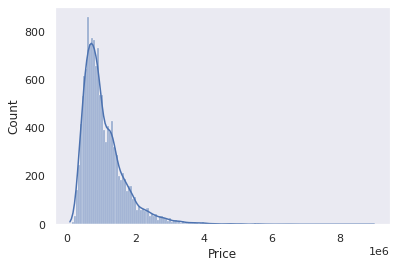

In [18]:
# Vemos la distribución de los datos
sns.histplot(data=melb_df, x="Price", kde=True)

In [19]:
melb_df['Price'].describe()

count     13580.000
mean    1075684.079
std      639310.724
min       85000.000
25%      650000.000
50%      903000.000
75%     1330000.000
max     9000000.000
Name: Price, dtype: float64

In [20]:
#Percentiles más bajos para filtrar valores extremos izquierdos
melb_df['Price'].quantile([0.01,.02, .05, .1, .15])

0.010   300000.000
0.020   331000.000
0.050   405000.000
0.100   480000.000
0.150   542000.000
Name: Price, dtype: float64

In [21]:
#Percentiles más altos para filtrar valores extremos derechos
melb_df['Price'].quantile([.95, .98, .99, .995, .998])

0.950   2290050.000
0.980   2865360.000
0.990   3338150.000
0.995   3900000.000
0.998   4747630.000
Name: Price, dtype: float64

In [22]:
# Limpieza de valores extremos
def clean_outliers_p01_p99(dataset, column_name):
    interesting_col = dataset[column_name]
    return dataset[(interesting_col <= (interesting_col.quantile(.99)))  & (interesting_col >= (interesting_col.quantile(.01)))]
    

In [23]:
# Redefinimos el nuevo dataframe
melb_df_1 = clean_outliers_p01_p99(melb_df,'Price')

In [24]:
melb_df_1.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [25]:
melb_df_1 = melb_df_1[['Type','Price','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt','CouncilArea','Suburb','Propertycount','Postcode']]

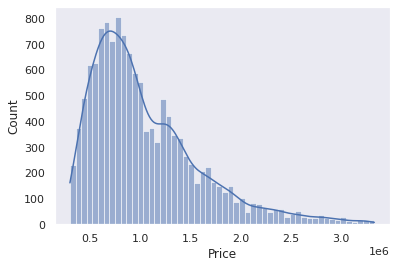

In [26]:
# Distribución del nuevo dataframe
sns.histplot(data=melb_df_1, x="Price", kde=True)

**2. Conjunto de datos de AirBnB**

In [27]:
df_airbnb

,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,2010.000,40.000,1,NaN,NaN
1,2134.000,50.000,1,NaN,NaN
2,2582.000,104.000,1,NaN,NaN
3,3000.000,150.504,3367,918.739,3407.205
4,3001.000,132.500,2,NaN,NaN
...,...,...,...,...,...
242,7367.000,230.000,1,NaN,NaN
243,8938.000,296.000,1,NaN,NaN
244,9004.000,226.000,1,NaN,NaN
245,9540.000,245.000,1,NaN,NaN


In [28]:
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]
airbnb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (35,77) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [29]:
airbnb_df['zipcode'] = pd.to_numeric(airbnb_df.zipcode, errors='coerce')

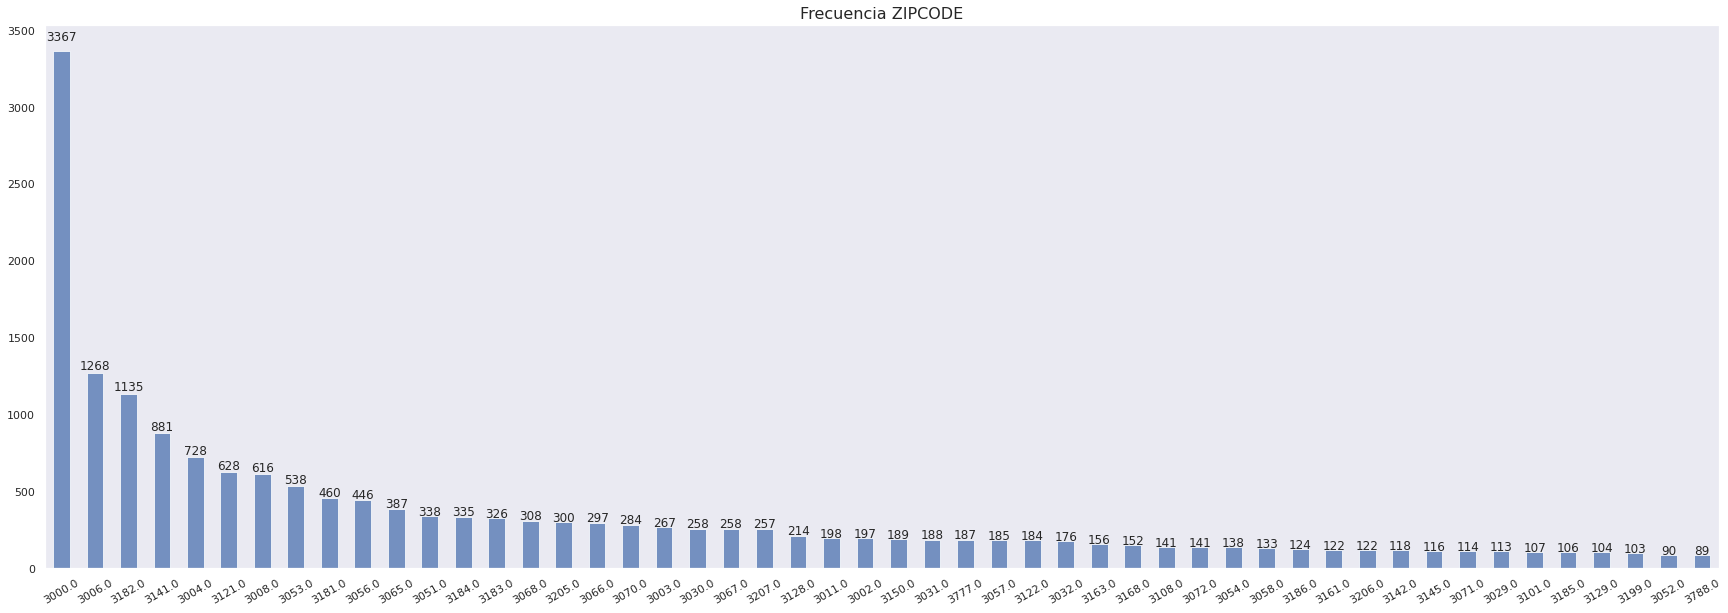

In [30]:
# Graficamos la frecuencia para los zipcode de AirBnB
ax = airbnb_df['zipcode'].value_counts().head(50).plot(kind='bar',alpha=0.75, rot=30, figsize=(30,10))
plt.title("Frecuencia ZIPCODE",fontsize= 16)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(height, (x + width/2, y + height*1.02), ha='center')

In [31]:
airbnb_df.zipcode.value_counts()

3000.000     3367
3006.000     1268
3182.000     1135
3141.000      881
3004.000      728
             ... 
3785.000        1
3096.000        1
30122.000       1
3912.000        1
4068.000        1
Name: zipcode, Length: 247, dtype: int64

In [32]:
zipcode_count = airbnb_df.zipcode.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'zipcode', 'zipcode': 'frequency'})
zipcode_count = zipcode_count[zipcode_count.frequency > 30]  # aca agrego el filtro de > 50

In [33]:
zipcode_count

,zipcode,frequency
0,3000.000,3367
1,3006.000,1268
2,3182.000,1135
3,3141.000,881
4,3004.000,728
...,...,...
110,3805.000,34
111,3806.000,33
112,3160.000,32
113,3174.000,32


In [34]:
airbnb_df

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,neighborhood_overview,notes,...,review_scores_location,review_scores_value,requires_license,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,9835,https://www.airbnb.com/rooms/9835,20181200000000.000,12/7/2018,Beautiful Room & House,NaN,"House: Clean, New, Modern, Quite, Safe. 10Km f...","House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,NaN,...,9.000,9.000,f,NaN,f,strict_14_with_grace_period,f,f,1,0.040
1,10803,https://www.airbnb.com/rooms/10803,20181200000000.000,12/7/2018,Room in Cool Deco Apartment in Brunswick,A large air conditioned room with queen spring...,The apartment is Deco/Edwardian in style and h...,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,NaN,...,9.000,9.000,f,NaN,t,moderate,t,t,1,1.500
2,12936,https://www.airbnb.com/rooms/12936,20181200000000.000,12/7/2018,St Kilda 1BR APT+BEACHSIDE+VIEWS+PARKING+WIFI+AC,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,FREE WiFi FREE in-building remote controlled g...,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,First floor apartment with both lift and stair...,...,9.000,9.000,f,NaN,f,strict_14_with_grace_period,f,f,17,0.150
3,15246,https://www.airbnb.com/rooms/15246,20181200000000.000,12/7/2018,Large private room-close to city,"Comfortable, relaxed house, a home away from ...",The atmosphere is relaxed and easy going. You ...,"Comfortable, relaxed house, a home away from ...","This is a great neighbourhood – it is quiet, y...",A simple self service breakfast is available –...,...,9.000,9.000,f,NaN,f,moderate,f,f,3,0.300
4,16760,https://www.airbnb.com/rooms/16760,20181200000000.000,12/7/2018,Melbourne BnB near City & Sports,NaN,We offer comfortable accommodation in Inner Me...,We offer comfortable accommodation in Inner Me...,NaN,NaN,...,10.000,9.000,f,NaN,f,moderate,f,f,1,0.740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22890,30592332,https://www.airbnb.com/rooms/30592332,20181200000000.000,12/7/2018,lovely home,"near city, near tram station",NaN,"near city, near tram station",NaN,NaN,...,NaN,NaN,f,NaN,t,flexible,f,f,1,NaN
22891,30592345,https://www.airbnb.com/rooms/30592345,20181200000000.000,12/7/2018,Melton South Getaway,"Close to: Melton Rail, Coles, Coffee Lounge an...",NaN,"Close to: Melton Rail, Coles, Coffee Lounge an...",NaN,NaN,...,NaN,NaN,f,NaN,t,flexible,f,f,2,NaN
22892,30592362,https://www.airbnb.com/rooms/30592362,20181200000000.000,12/7/2018,"Glen Waverley(close to train, post, stores)近地铁...","Hi, 我是一名中国留学生. 由于暑假原因决定出租我的房间. 我会留下我所使用的物品给我的租...",NaN,"Hi, 我是一名中国留学生. 由于暑假原因决定出租我的房间. 我会留下我所使用的物品给我的租...",NaN,NaN,...,NaN,NaN,f,NaN,t,flexible,f,f,1,NaN
22893,30592590,https://www.airbnb.com/rooms/30592590,20181200000000.000,12/7/2018,Crown Jewel in the heart of Melbourne,Immaculately presented and carefully maintaine...,Security is a focus with intercom-activated en...,Immaculately presented and carefully maintaine...,A plethora of Melbourne highlights are just a ...,NaN,...,NaN,NaN,f,NaN,t,moderate,f,f,17,NaN


Limpieza

• Transformación de Tabla de Frecuencias : zipcode_count

• Tomamos en cuenta aquellos zipcode con frecuencia mayor a 30

In [35]:
zipcode_count_new = zipcode_count.zipcode.tolist() 

In [36]:
airbnb_df_clean = airbnb_df[airbnb_df.zipcode.isin(zipcode_count_new)]
print("cantidad de zipcodes con frecuencia mayor a 30: ", airbnb_df_clean.zipcode.nunique())
print("longitud del dataframe limpio: ", len(airbnb_df_clean))

cantidad de zipcodes con frecuencia mayor a 30:  115
longitud del dataframe limpio:  21243


In [37]:
airbnb_df_clean

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,neighborhood_overview,notes,...,review_scores_location,review_scores_value,requires_license,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1,10803,https://www.airbnb.com/rooms/10803,20181200000000.000,12/7/2018,Room in Cool Deco Apartment in Brunswick,A large air conditioned room with queen spring...,The apartment is Deco/Edwardian in style and h...,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,NaN,...,9.000,9.000,f,NaN,t,moderate,t,t,1,1.500
2,12936,https://www.airbnb.com/rooms/12936,20181200000000.000,12/7/2018,St Kilda 1BR APT+BEACHSIDE+VIEWS+PARKING+WIFI+AC,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,FREE WiFi FREE in-building remote controlled g...,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,First floor apartment with both lift and stair...,...,9.000,9.000,f,NaN,f,strict_14_with_grace_period,f,f,17,0.150
3,15246,https://www.airbnb.com/rooms/15246,20181200000000.000,12/7/2018,Large private room-close to city,"Comfortable, relaxed house, a home away from ...",The atmosphere is relaxed and easy going. You ...,"Comfortable, relaxed house, a home away from ...","This is a great neighbourhood – it is quiet, y...",A simple self service breakfast is available –...,...,9.000,9.000,f,NaN,f,moderate,f,f,3,0.300
4,16760,https://www.airbnb.com/rooms/16760,20181200000000.000,12/7/2018,Melbourne BnB near City & Sports,NaN,We offer comfortable accommodation in Inner Me...,We offer comfortable accommodation in Inner Me...,NaN,NaN,...,10.000,9.000,f,NaN,f,moderate,f,f,1,0.740
5,38271,https://www.airbnb.com/rooms/38271,20181200000000.000,12/7/2018,Melbourne - Old Trafford Apartment,Please note: No booking will be accepted with ...,Please note: No booking will be accepted with ...,Please note: No booking will be accepted with ...,Our street is quiet & secluded but within walk...,1. While the apartment is completely separate ...,...,10.000,10.000,f,NaN,f,flexible,f,f,1,1.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22889,30592128,https://www.airbnb.com/rooms/30592128,20181200000000.000,12/7/2018,Valuable share room in CBD,This is a idea for short stay backpacker who d...,The price includes the one single mattress in ...,This is a idea for short stay backpacker who d...,NaN,Please keep the place nice any clean as you go,...,NaN,NaN,f,NaN,f,moderate,f,f,1,NaN
22890,30592332,https://www.airbnb.com/rooms/30592332,20181200000000.000,12/7/2018,lovely home,"near city, near tram station",NaN,"near city, near tram station",NaN,NaN,...,NaN,NaN,f,NaN,t,flexible,f,f,1,NaN
22892,30592362,https://www.airbnb.com/rooms/30592362,20181200000000.000,12/7/2018,"Glen Waverley(close to train, post, stores)近地铁...","Hi, 我是一名中国留学生. 由于暑假原因决定出租我的房间. 我会留下我所使用的物品给我的租...",NaN,"Hi, 我是一名中国留学生. 由于暑假原因决定出租我的房间. 我会留下我所使用的物品给我的租...",NaN,NaN,...,NaN,NaN,f,NaN,t,flexible,f,f,1,NaN
22893,30592590,https://www.airbnb.com/rooms/30592590,20181200000000.000,12/7/2018,Crown Jewel in the heart of Melbourne,Immaculately presented and carefully maintaine...,Security is a focus with intercom-activated en...,Immaculately presented and carefully maintaine...,A plethora of Melbourne highlights are just a ...,NaN,...,NaN,NaN,f,NaN,t,moderate,f,f,17,NaN


2.1 Variables a agregar: price, weekly_price y monthly_price

In [38]:
#Interestig columns Airbnb price,weekly_price,monthly_price

In [39]:
relevant_cols = ['price', 'weekly_price', 'monthly_price']

In [40]:
#Seleccionamos como medida de ambas la mediana
airbnb_df_by_zipcode = airbnb_df_clean[relevant_cols + ['zipcode']]\
  .groupby('zipcode').median().reset_index()[:]

In [41]:
airbnb_df_by_zipcode=airbnb_df_by_zipcode.rename(columns={'price':'price_airbnb'})

2.2 Unión de conjunto de datos

In [42]:
melb_df_1.count()

Type             13310
Price            13310
Distance         13310
Bedroom2         13310
Bathroom         13310
Car              13248
Landsize         13310
BuildingArea      6968
YearBuilt         8019
CouncilArea      11957
Suburb           13310
Propertycount    13310
Postcode         13310
dtype: int64

In [43]:
merged_df = melb_df_1.merge(
    airbnb_df_by_zipcode, how='left',
    left_on='Postcode', right_on='zipcode'
)
merged_df[:200]

,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Suburb,Propertycount,Postcode,zipcode,price_airbnb,weekly_price,monthly_price
0,h,1480000.000,2.500,2.000,1.000,1.000,202.000,NaN,NaN,Yarra,Abbotsford,4019.000,3067.000,3067.000,100.000,380.000,1440.000
1,h,1035000.000,2.500,2.000,1.000,0.000,156.000,79.000,1900.000,Yarra,Abbotsford,4019.000,3067.000,3067.000,100.000,380.000,1440.000
2,h,1465000.000,2.500,3.000,2.000,0.000,134.000,150.000,1900.000,Yarra,Abbotsford,4019.000,3067.000,3067.000,100.000,380.000,1440.000
3,h,850000.000,2.500,3.000,2.000,1.000,94.000,NaN,NaN,Yarra,Abbotsford,4019.000,3067.000,3067.000,100.000,380.000,1440.000
4,h,1600000.000,2.500,3.000,1.000,2.000,120.000,142.000,2014.000,Yarra,Abbotsford,4019.000,3067.000,3067.000,100.000,380.000,1440.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,h,700000.000,11.100,3.000,1.000,3.000,554.000,NaN,NaN,Hobsons Bay,Altona North,5132.000,3025.000,NaN,NaN,NaN,NaN
196,t,640000.000,11.100,2.000,1.000,1.000,252.000,NaN,1965.000,Hobsons Bay,Altona North,5132.000,3025.000,NaN,NaN,NaN,NaN
197,h,650000.000,11.100,4.000,1.000,4.000,558.000,NaN,NaN,Hobsons Bay,Altona North,5132.000,3025.000,NaN,NaN,NaN,NaN
198,h,675000.000,11.100,3.000,2.000,2.000,171.000,109.000,2012.000,Hobsons Bay,Altona North,5132.000,3025.000,NaN,NaN,NaN,NaN


2.3 Investigación de otras variables


1.   Completar la variable Barrio del dataframe de Melbourne según los datos de latitud y longitud.
2.   Combinar la información de precio, tomando precio promedio según el número de habitaciones del dataframe airbnb.




## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [44]:
merged_df.to_csv("resultado_ej3_practico2_entrega1.csv", index=None)

In [45]:
from google.colab import files
files.download('resultado_ej3_practico2_entrega1.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Ejercicios opcionales:

1. Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extraccion, transformacion y carga, armando una funcion para cada etapa del proceso y luego un main que corra todos los pasos requeridos.

2. Armar un DAG en Apache Airflow que corra el ETL. (https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html)